In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing

from gc import collect as collect_garbage
from psutil import virtual_memory
from os import scandir

In [2]:
%matplotlib widget

In [3]:
collect_garbage()
virtual_memory()

svmem(total=12655771648, available=6308098048, percent=50.2, used=6347673600, free=6308098048)

In [4]:
# Figure 10: RR Intervals Before and After Interval Reduction
# I can just give a zoomed in picture that shows multiple intervals
# being processed


In [5]:
df_before = pd.read_csv("01-outputs/00-rpeaks/rpeaks_1a.csv")
df_before["interval"] = df_before["time"].diff()

In [6]:
df_before

,Unnamed: 0,time,interval
0,56,345600.265306,NaN
1,151,345600.642058,0.376752
2,246,345601.010424,0.368366
3,341,345601.393469,0.383045
4,435,345601.779318,0.385849
...,...,...,...
663506,65845859,604798.408304,0.397616
663507,65845954,604798.793622,0.385318
663508,65846049,604799.164347,0.370725
663509,65846145,604799.542720,0.378373


In [7]:
df_after = pd.read_csv("01-outputs/01-rr-intervals/rr_intervals_1a.csv")

In [8]:
df_after

,time,interval
0,345601.010424,0.368366
1,345601.393469,0.383045
2,345601.779318,0.385849
3,345602.158719,0.379400
4,345602.523748,0.365029
...,...,...
691565,614351.491204,0.369104
691566,614351.855525,0.364321
691567,614352.215369,0.359845
691568,614352.578869,0.363500


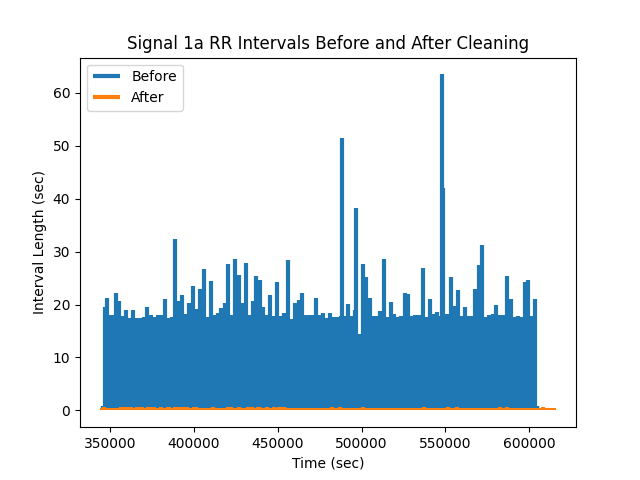

In [9]:
fig = plt.figure()
plt.vlines(df_before["time"], 0, df_before["interval"], color = "C0", linewidth=3)
plt.vlines(df_after["time"], 0, df_after["interval"], color = "C1", linewidth=3)
plt.xlabel("Time (sec)")
plt.ylabel("Interval Length (sec)")
plt.title("Signal 1a RR Intervals Before and After Cleaning")
plt.legend(["Before", "After"], loc = "upper left")
plt.show()

In [ ]:
# Figure 9: Lengthy RR Intervals
# All I want here is a very zoomed in picture that explains the bar 
# visualization. I need to figure out how to do a dual y axis for this one.
# Actually, I do want two pictures, one for missing data and one for missed
# beats


In [4]:
df = pd.read_csv("C:/Users/aidan/Box/Deidentified-Raw-Waveforms/raw_waves_data_1a.csv", usecols=["time", "257"])

cols=["time", "257"]

# Complete the signal in the order of 257 (ECG1), then  258 (ECG2), and 
# then 317 (EG3), then ffill for remaining missing values
signal = pd.Series(df[cols[1]])
i=2
while True:
    try:
        signal = signal.combine_first(df[cols[i]])
        i+=1
    except IndexError:
        break
signal = signal.fillna(method="ffill")
signal = pd.to_numeric(signal)
print("Signals combined and filled in")

raw_signal = pd.Series.copy(signal, deep=True)

# Remove spikes and troughs by pinpointing values out of bounds and then 
# erasing left and right of those pinpoints by delta indices
delta = 125
filt = (signal <= -10) | (signal >= 10)
filt.loc[~filt] = np.nan
filt.fillna(method="ffill", limit=delta, inplace=True)
filt.fillna(method="bfill", limit=delta, inplace=True)
filt.fillna(value=False, inplace=True)

signal.loc[filt] = np.nan
signal.fillna(method="ffill", inplace=True)
print("Troughs and spikes removed")

collect_garbage()
print(virtual_memory())

Signals combined and filled in
Troughs and spikes removed
svmem(total=12655771648, available=5031419904, percent=60.2, used=7624351744, free=5031419904)


In [5]:
# Get the RR interval data
df_rr = pd.read_csv("01-outputs/00-rpeaks/rpeaks_1a.csv")
df_rr["interval"] = df_rr["time"].diff()

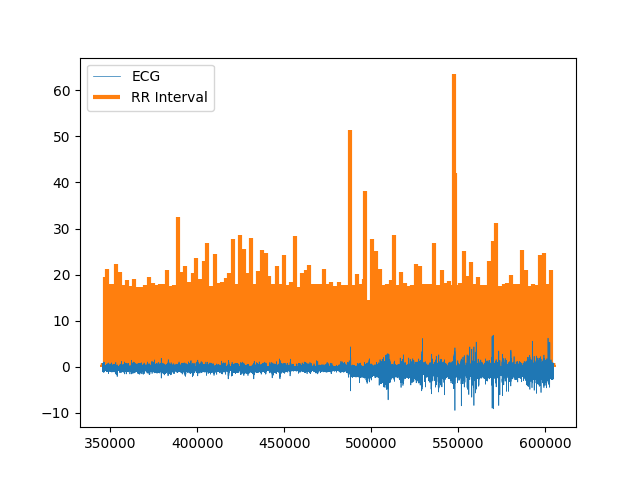

In [6]:

fig = plt.figure()
plt.plot(df["time"], signal, color = "C0", linewidth=0.5)
plt.vlines(df_rr["time"], 0, df_rr["interval"], color = "C1", linewidth=3)
plt.legend(["ECG", "RR Interval"], loc="upper left")
plt.show()

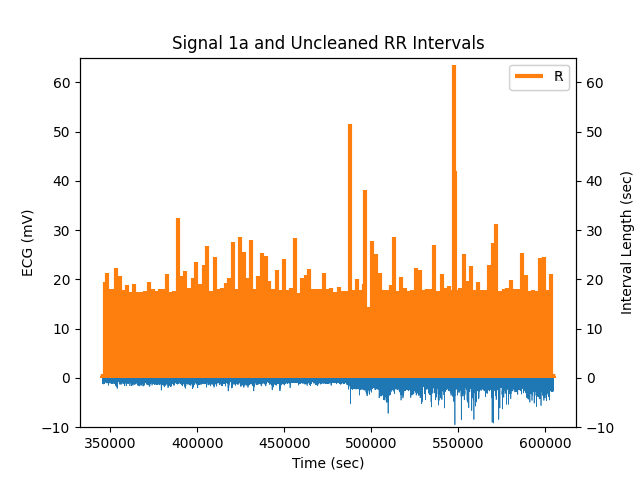

In [9]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(df["time"], signal, color = "C0", linewidth=0.5)


ax2.set_ylim(ax1.get_ylim())
ax2.vlines(df_rr["time"], 0, df_rr["interval"], color="C1", linewidth=3)
ax2.set_ylim([-10, 65])
ax1.set_ylim([-10, 65])

ax1.set_xlabel("Time (sec)")
ax1.set_ylabel("ECG (mV)")
ax2.set_ylabel("Interval Length (sec)")
ax1.set_title("Signal 1a and Uncleaned RR Intervals")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

#ax2.legend(lines, labels, loc="upper left")
ax1.legend("ECG",loc="upper left")
ax2.legend("RR Intervals",loc="upper left")



plt.show()

In [7]:
virtual_memory()

svmem(total=12655771648, available=1707610112, percent=86.5, used=10948161536, free=1707610112)

In [12]:
filt = ~df_rr["interval"].isna()
m = max(df_rr["interval"].loc[filt])
print(m)

63.47376298904419


In [8]:
lines_1

[]

In [ ]:
# Figure 8: a stream of QRS complexes

In [7]:
# LOAD IN THE SIGNAL
df = pd.read_csv("C:/Users/aidan/Box/Deidentified-Raw-Waveforms/raw_waves_data_1a.csv", usecols=["time", "257"])

cols=["time", "257"]

# Complete the signal in the order of 257 (ECG1), then  258 (ECG2), and 
# then 317 (EG3), then ffill for remaining missing values
signal = pd.Series(df[cols[1]])
i=2
while True:
    try:
        signal = signal.combine_first(df[cols[i]])
        i+=1
    except IndexError:
        break
signal = signal.fillna(method="ffill")
signal = pd.to_numeric(signal)
print("Signals combined and filled in")

raw_signal = pd.Series.copy(signal, deep=True)

# Remove spikes and troughs by pinpointing values out of bounds and then 
# erasing left and right of those pinpoints by delta indices
delta = 125
filt = (signal <= -10) | (signal >= 10)
filt.loc[~filt] = np.nan
filt.fillna(method="ffill", limit=delta, inplace=True)
filt.fillna(method="bfill", limit=delta, inplace=True)
filt.fillna(value=False, inplace=True)

signal.loc[filt] = np.nan
signal.fillna(method="ffill", inplace=True)
print("Troughs and spikes removed")

collect_garbage()
print(virtual_memory())

Signals combined and filled in
Troughs and spikes removed
svmem(total=12655771648, available=3157196800, percent=75.1, used=9498574848, free=3157196800)


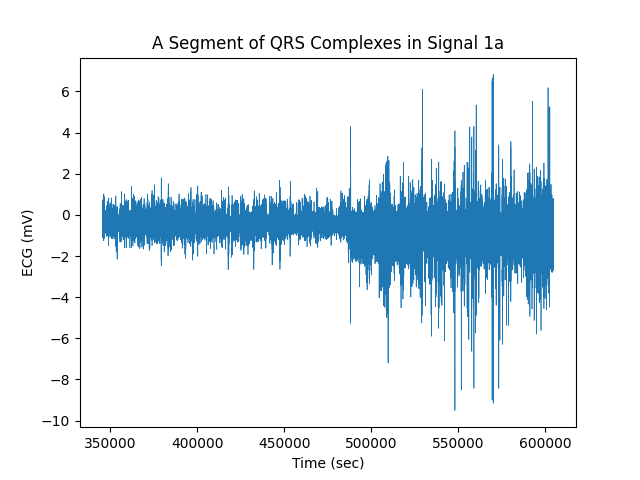

In [8]:
fig = plt.figure()
plt.plot(df["time"], signal, color="C0", linewidth=0.5)
plt.xlabel("Time (sec)")
plt.ylabel("ECG (mV)")
plt.title("A Segment of QRS Complexes in Signal 1a")
plt.show()

In [4]:
# Figure 7: Signal before and after removing deviations

In [5]:
# LOAD IN THE SIGNAL
df = pd.read_csv("C:/Users/aidan/Box/Deidentified-Raw-Waveforms/raw_waves_data_1a.csv", usecols=["time", "257"])

cols=["time", "257"]

# Complete the signal in the order of 257 (ECG1), then  258 (ECG2), and 
# then 317 (EG3), then ffill for remaining missing values
signal = pd.Series(df[cols[1]])
i=2
while True:
    try:
        signal = signal.combine_first(df[cols[i]])
        i+=1
    except IndexError:
        break
signal = signal.fillna(method="ffill")
signal = pd.to_numeric(signal)
print("Signals combined and filled in")

raw_signal = pd.Series.copy(signal, deep=True)

# Remove spikes and troughs by pinpointing values out of bounds and then 
# erasing left and right of those pinpoints by delta indices
delta = 125
filt = (signal <= -10) | (signal >= 10)
filt.loc[~filt] = np.nan
filt.fillna(method="ffill", limit=delta, inplace=True)
filt.fillna(method="bfill", limit=delta, inplace=True)
filt.fillna(value=False, inplace=True)

signal.loc[filt] = np.nan
signal.fillna(method="ffill", inplace=True)
print("Troughs and spikes removed")

collect_garbage()
print(virtual_memory())

Signals combined and filled in
Troughs and spikes removed
svmem(total=12655771648, available=4520824832, percent=64.3, used=8134946816, free=4520824832)


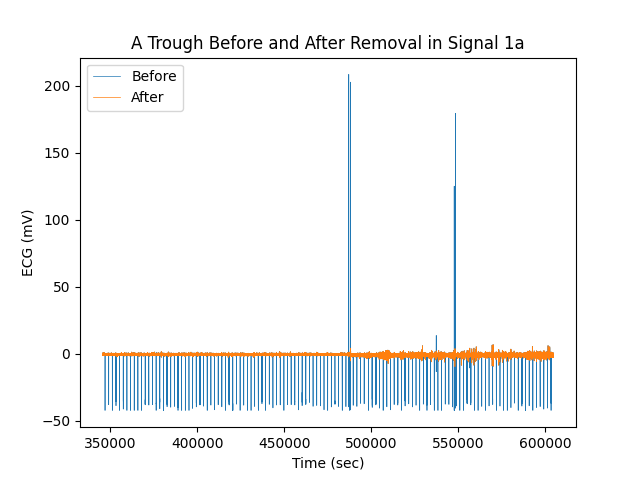

In [6]:
fig = plt.figure()
plt.plot(df["time"], raw_signal, color="C0", linewidth=0.5)
plt.plot(df["time"], signal, color="C1", linewidth=0.5)
plt.xlabel("Time (sec)")
plt.ylabel("ECG (mV)")
plt.title("A Trough Before and After Removal in Signal 1a")
plt.legend(["Before", "After"], loc="upper left")
plt.show()

In [4]:
# Figure 6: Zoomed in view of trough

In [5]:
# LOAD IN THE SIGNAL
df = pd.read_csv("C:/Users/aidan/Box/Deidentified-Raw-Waveforms/raw_waves_data_1a.csv", usecols=["time", "257"])

cols=["time", "257"]

# Complete the signal in the order of 257 (ECG1), then  258 (ECG2), and 
# then 317 (EG3), then ffill for remaining missing values
signal = pd.Series(df[cols[1]])
i=2
while True:
    try:
        signal = signal.combine_first(df[cols[i]])
        i+=1
    except IndexError:
        break
signal = signal.fillna(method="ffill")
signal = pd.to_numeric(signal)
print("Signals combined and filled in")

Signals combined and filled in


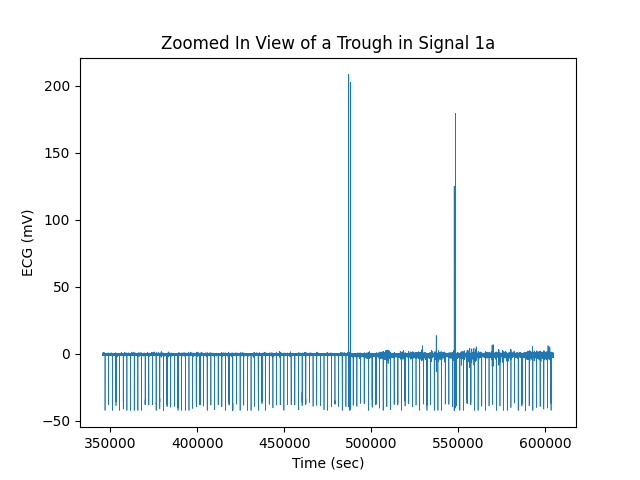

In [6]:
fig = plt.figure()
plt.plot(df["time"], signal, color="C0", linewidth=0.5)
plt.xlabel("Time (sec)")
plt.ylabel("ECG (mV)")
plt.title("Zoomed In View of a Trough in Signal 1a")
plt.show()

In [4]:
# Figure 5: A Signal with Troughs and Spikes

In [5]:
# LOAD IN THE SIGNAL
df = pd.read_csv("C:/Users/aidan/Box/Deidentified-Raw-Waveforms/raw_waves_data_1a.csv", usecols=["time", "257"])

cols=["time", "257"]

# Complete the signal in the order of 257 (ECG1), then  258 (ECG2), and 
# then 317 (EG3), then ffill for remaining missing values
signal = pd.Series(df[cols[1]])
i=2
while True:
    try:
        signal = signal.combine_first(df[cols[i]])
        i+=1
    except IndexError:
        break
signal = signal.fillna(method="ffill")
signal = pd.to_numeric(signal)
print("Signals combined and filled in")

Signals combined and filled in


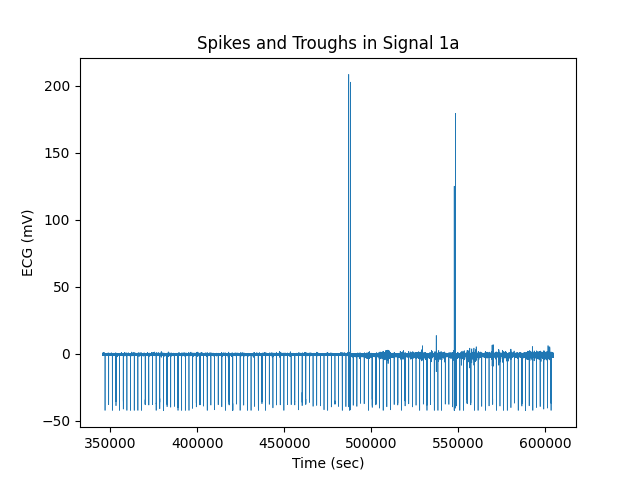

In [6]:
fig = plt.figure()
plt.plot(df["time"], signal, color="C0", linewidth=0.5)
plt.xlabel("Time (sec)")
plt.ylabel("ECG (mV)")
plt.title("Spikes and Troughs in Signal 1a")
plt.show()


In [4]:
# Figure 4: Heartbeat detection around a segment of flat data
# Let's look at signal 1a around a trough and show that the detection is a 
# success

In [5]:
# LOAD IN THE SIGNAL
df = pd.read_csv("C:/Users/aidan/Box/Deidentified-Raw-Waveforms/raw_waves_data_1a.csv", usecols=["time", "257"])

cols=["time", "257"]

# Complete the signal in the order of 257 (ECG1), then  258 (ECG2), and 
# then 317 (EG3), then ffill for remaining missing values
signal = pd.Series(df[cols[1]])
i=2
while True:
    try:
        signal = signal.combine_first(df[cols[i]])
        i+=1
    except IndexError:
        break
signal = signal.fillna(method="ffill")
signal = pd.to_numeric(signal)
print("Signals combined and filled in")

# Remove spikes and troughs by pinpointing values out of bounds and then 
# erasing left and right of those pinpoints by delta indices
delta = 125
filt = (signal <= -10) | (signal >= 10)
filt.loc[~filt] = np.nan
filt.fillna(method="ffill", limit=delta, inplace=True)
filt.fillna(method="bfill", limit=delta, inplace=True)
filt.fillna(value=False, inplace=True)

signal.loc[filt] = np.nan
signal.fillna(method="ffill", inplace=True)
print("Troughs and spikes removed")

collect_garbage()
print(virtual_memory())


Signals combined and filled in
Troughs and spikes removed
svmem(total=12655771648, available=7451930624, percent=41.1, used=5203841024, free=7451930624)


In [6]:
df["signal"] = signal

rpeaks_df = pd.read_csv("01-outputs/00-rpeaks/rpeaks_1a.csv")
rpeaks_df.set_index("Unnamed: 0", drop=True, inplace=True)

rpeaks_t = rpeaks_df["time"]
rpeaks_y = df.loc[ list(rpeaks_df.index), "signal" ]

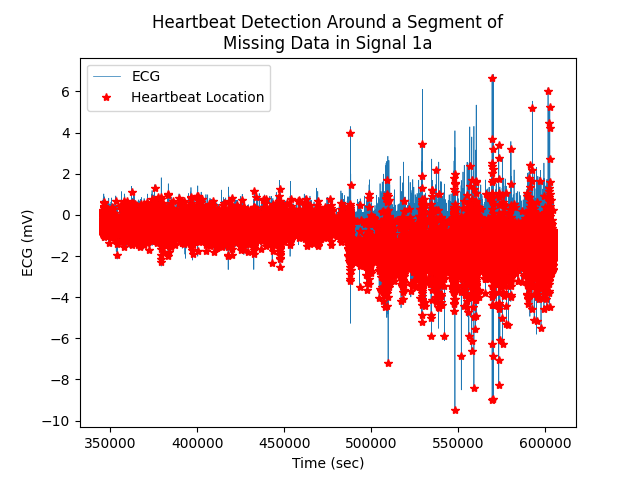

In [7]:
fig = plt.figure()
plt.plot(df["time"], df["signal"], color="C0", linewidth=0.5)
plt.plot(rpeaks_t, rpeaks_y, linewidth=0, marker="*", color="red")
plt.title("Heartbeat Detection Around a Segment of\nMissing Data in Signal 1a")
plt.xlabel("Time (sec)")
plt.ylabel("ECG (mV)")
plt.legend(["ECG", "Heartbeat Location"], loc="upper left")
plt.show()


In [4]:
# Figure 3: Example of the Multiple ECG Signals

In [5]:
df = pd.read_csv("C:/Users/aidan/Box/Deidentified-Raw-Waveforms/raw_waves_data_1d.csv", usecols=["time", "257", "258", "317"])
df.columns = ["time", "ecg1","ecg2","ecg3"]
virtual_memory()

svmem(total=12655771648, available=7175184384, percent=43.3, used=5480587264, free=7175184384)

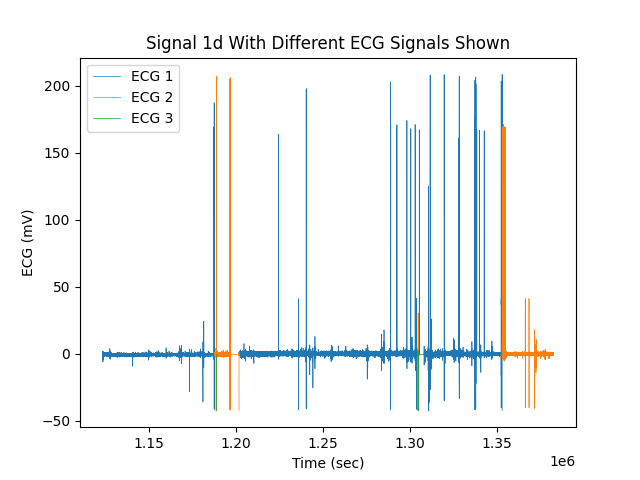

In [6]:
# Need to see the three signals side by side
fig = plt.figure()
plt.plot(df["time"], df["ecg1"], color="C0", linewidth=0.5)
plt.plot(df["time"], df["ecg2"], color="C1", linewidth=0.5)
plt.plot(df["time"], df["ecg3"], color="C2", linewidth=0.5)
plt.title("Signal 1d With Different ECG Signals Shown")
plt.xlabel("Time (sec)")
plt.ylabel("ECG (mV)")
plt.legend(["ECG 1", "ECG 2", "ECG 3"])
plt.show()

In [7]:
virtual_memory()

svmem(total=12655771648, available=6117117952, percent=51.7, used=6538653696, free=6117117952)